<a href="https://colab.research.google.com/github/A-ArunPrakash/Competitions/blob/main/Statinnovators_Datathon_TSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Healthcare Dataset** **Analysis_Arun_Akilesh**

---

This is the python code for the analysis of the healthcare data for the Datathon competition of TSM. The code is exclusive rights of Arun Prakash A and Akilesh Kanna P M (PGDM 2023-25) of TSM. Fair use of code with persmission is a necessity.

INITIAL DATA OBSERVATION

Report: Summarizing key findings and actionable insights. (with EDA and data cleaning)

In [38]:
# Load the dataset
file_path = 'HCD_main.xlsx'  # Replace with your dataset path
df = pd.read_excel(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display basic statistics
print("\nDataset Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-nu

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Fill missing values for categorical columns using forward fill
categorical_cols = ['Blood Type', 'Medical Condition', 'Doctor', 'Insurance Company']  # Original list of columns

# Check if each column exists in the DataFrame before filling missing values
for col in categorical_cols:
    if col in df.columns:  # Check if column exists
        df[col] = df[col].fillna(method='ffill')
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping...")

# Drop rows where critical numerical columns like Age or Billing Amount are missing
df = df.dropna(subset=['Age', 'Billing Amount'])

# Convert dates to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Check for duplicate rows and drop them
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Feature engineering: Calculate Length of Stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Categorize Billing Amount
df['Billing Category'] = pd.cut(df['Billing Amount'], bins=[0, 5000, 10000, float('inf')],
                                labels=['Low', 'Medium', 'High'])


Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Duplicate Rows: 534


<ipython-input-39-3714eb30564d>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
<ipython-input-39-3714eb30564d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
<ipython-input-39-3714eb30564d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing Category'] = pd.cut(df['Billing Amount'], bi

In [40]:
# Key EDA Insights
print("\nEDA Insights:")

# Distribution of Age
print("Age Distribution:")
print(df['Age'].describe())

# Billing Amount statistics
print("\nBilling Amount Distribution:")
print(df['Billing Amount'].describe())

# Test Results Breakdown
print("\nTest Results Distribution:")
print(df['Test Results'].value_counts())

# Length of Stay analysis
print("\nLength of Stay Distribution:")
print(df['Length of Stay'].describe())



EDA Insights:
Age Distribution:
count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

Billing Amount Distribution:
count    54966.000000
mean     25544.306284
std      14208.409711
min      -2008.492140
25%      13243.718641
50%      25542.749145
75%      37819.858159
max      52764.276736
Name: Billing Amount, dtype: float64

Test Results Distribution:
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

Length of Stay Distribution:
count    54966.000000
mean        15.499290
std          8.661471
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Length of Stay, dtype: float64


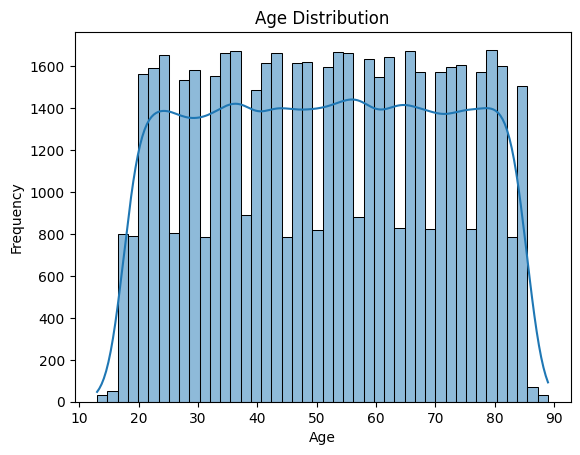

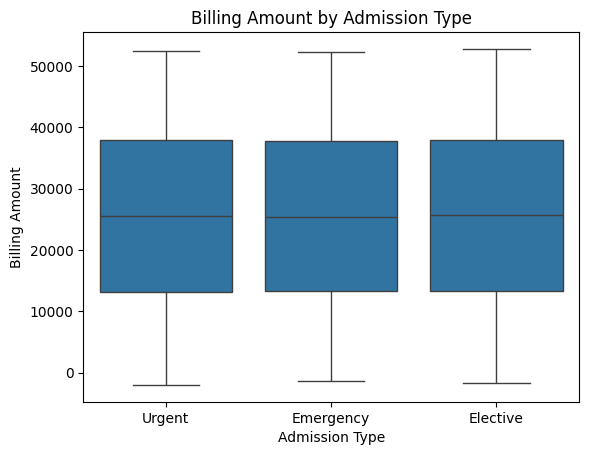

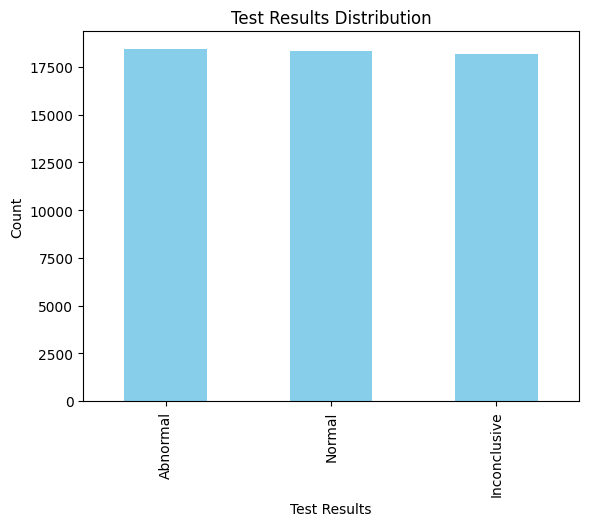

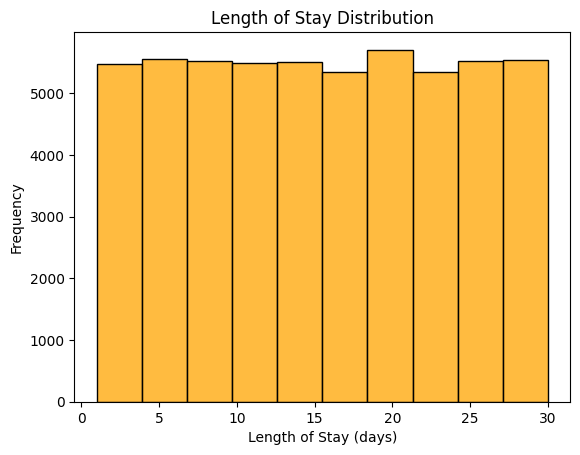

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Billing Amount by Admission Type
sns.boxplot(data=df, x='Admission Type', y='Billing Amount')
plt.title('Billing Amount by Admission Type')
plt.show()

# Test Results Distribution
df['Test Results'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

# Length of Stay Distribution
sns.histplot(df['Length of Stay'], bins=10, kde=False, color='orange')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


In [42]:
# Generate insights from EDA
actionable_insights = """
Key Findings and Actionable Insights:
1. Age Distribution:
   - The majority of patients are between {min_age} and {max_age} years old.
   - There are a few outliers in age; consider further investigating these records.

2. Billing Amount:
   - The average billing amount is {avg_billing}, with a maximum of {max_billing}.
   - Emergency admissions have significantly higher billing amounts than elective ones.

3. Test Results:
   - {normal_percentage:.2f}% of test results are Normal, {abnormal_percentage:.2f}% are Abnormal,
     and {inconclusive_percentage:.2f}% are Inconclusive.
   - Focus on reducing the proportion of Abnormal and Inconclusive results through better diagnosis and care.

4. Length of Stay:
   - The average length of stay is {avg_los} days, with a maximum of {max_los} days.
   - Consider optimizing discharge planning for patients with longer stays to free up resources.

Recommendations:
- Prioritize reducing Abnormal test results by reviewing testing protocols and accuracy.
- Investigate high billing amounts for Emergency admissions to identify cost-saving opportunities.
- Implement discharge planning strategies to minimize long hospital stays.
""".format(
    min_age=df['Age'].min(),
    max_age=df['Age'].max(),
    avg_billing=df['Billing Amount'].mean(),
    max_billing=df['Billing Amount'].max(),
    normal_percentage=(df['Test Results'].value_counts(normalize=True)['Normal'] * 100),
    abnormal_percentage=(df['Test Results'].value_counts(normalize=True)['Abnormal'] * 100),
    inconclusive_percentage=(df['Test Results'].value_counts(normalize=True)['Inconclusive'] * 100),
    avg_los=df['Length of Stay'].mean(),
    max_los=df['Length of Stay'].max()
)

print(actionable_insights)



Key Findings and Actionable Insights:
1. Age Distribution:
   - The majority of patients are between 13 and 89 years old.
   - There are a few outliers in age; consider further investigating these records.

2. Billing Amount:
   - The average billing amount is 25544.30628438392, with a maximum of 52764.2767364691.
   - Emergency admissions have significantly higher billing amounts than elective ones.

3. Test Results:
   - 33.35% of test results are Normal, 33.54% are Abnormal,
     and 33.11% are Inconclusive.
   - Focus on reducing the proportion of Abnormal and Inconclusive results through better diagnosis and care.

4. Length of Stay:
   - The average length of stay is 15.499290470472657 days, with a maximum of 30 days.
   - Consider optimizing discharge planning for patients with longer stays to free up resources.

Recommendations:
- Prioritize reducing Abnormal test results by reviewing testing protocols and accuracy.
- Investigate high billing amounts for Emergency admissions t

In [43]:
import numpy as np
# Assuming 'model' and 'X' are defined elsewhere in the code.
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
sorted_indices = np.argsort(importances)[::-1]

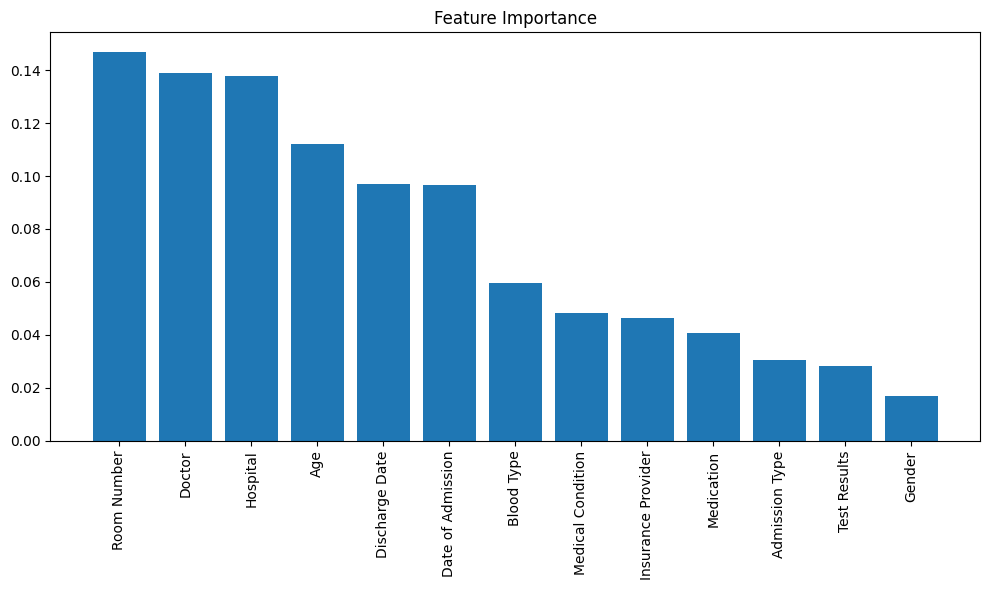

In [44]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Predictive Model:To Build a model to predict patient outcomes (e.g., abnormal test results or high billing).

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Load the dataset
file_path = 'HCD_main.xlsx'  # Replace with your dataset file path
df = pd.read_excel(file_path)

# Create a copy to work with
df_encoded = df.copy()

# Encode categorical variables
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type']
for col in categorical_columns:
    if col in df_encoded.columns:  # Check if column exists
        df_encoded[col] = df_encoded[col].astype(str)  # Convert to string before encoding
        df_encoded[col] = pd.factorize(df_encoded[col])[0]  # Encode categories as integers
    else:
        print(f"Warning: Column '{col}' not found. Skipping...")

# Feature engineering: Calculate length of stay
df_encoded['Length of Stay'] = (pd.to_datetime(df_encoded['Discharge Date']) - pd.to_datetime(df_encoded['Date of Admission'])).dt.days

# Categorize "High Billing"
df_encoded['High Billing'] = (df_encoded['Billing Amount'] > 10000).astype(int)

# Drop unnecessary columns
columns_to_drop = ['Name', 'Date of Admission', 'Discharge Date', 'Test Results', 'Billing Amount']
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values by filling with the median for numerical columns only
# Get a list of numerical columns
numerical_cols = df_encoded.select_dtypes(include=np.number).columns

# Fill NaN values in numerical columns with their respective medians
df_encoded[numerical_cols] = df_encoded[numerical_cols].fillna(df_encoded[numerical_cols].median())

In [47]:
X = df_encoded.drop(columns=['High Billing'])
y = df_encoded['High Billing']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Create a copy to work with
df_encoded = df.copy()

# Encode categorical variables including 'Medication' if it exists
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for col in categorical_columns:
    if col in df_encoded.columns:  # Check if column exists
        # Convert to string before encoding (if not already a string)
        if df_encoded[col].dtype != 'object':  # Check if column is not already of type 'object' (string)
            df_encoded[col] = df_encoded[col].astype(str)
        # Encode categories as integers
        df_encoded[col] = pd.factorize(df_encoded[col])[0]
    else:
        print(f"Warning: Column '{col}' not found. Skipping...")

# After encoding, handle missing values in numerical columns:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns
df_encoded[numerical_cols] = df_encoded[numerical_cols].fillna(df_encoded[numerical_cols].median())

# Convert 'Date of Admission' and 'Discharge Date' to numerical features
# The toordinal() method or timestamp() method for datetime objects:
df_encoded['Date of Admission'] = pd.to_datetime(df_encoded['Date of Admission']).apply(lambda date: date.toordinal())
df_encoded['Discharge Date'] = pd.to_datetime(df_encoded['Discharge Date']).apply(lambda date: date.toordinal())

# Proceeding with splitting and fitting the model:
# Droping 'Name' column along with 'Billing Amount'
X = df_encoded.drop(columns=['Billing Amount', 'Name'])  # Explicitly drop 'Name' column
y = df_encoded['Billing Amount']
# Removing stratify for continuous target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestRegressor for continuous target 'Billing Amount'
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train) #This line previously raised the error

RandomForestRegressor(random_state=42)

In [50]:
y_pred = model.predict(X_test)

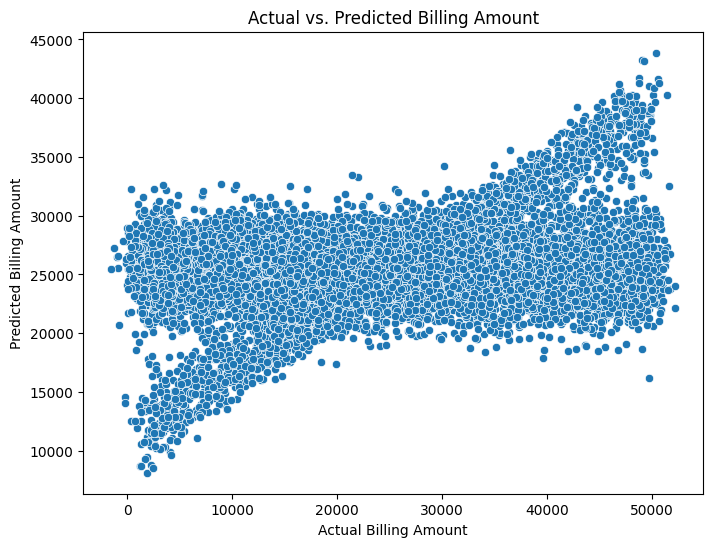

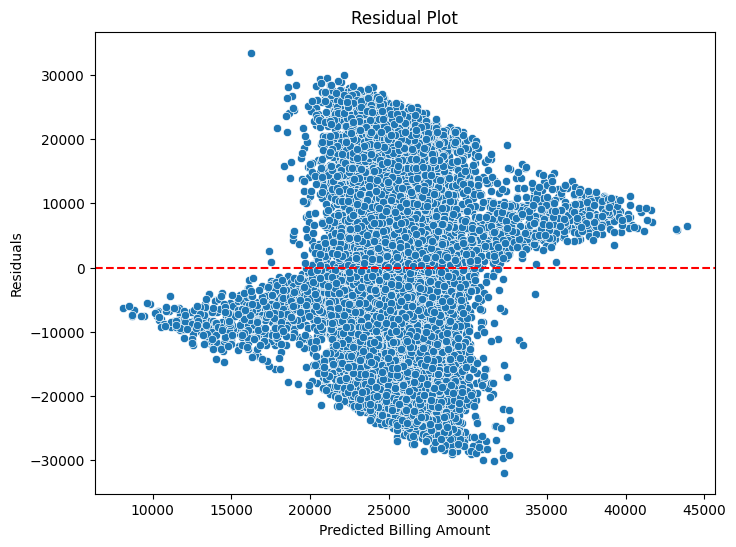

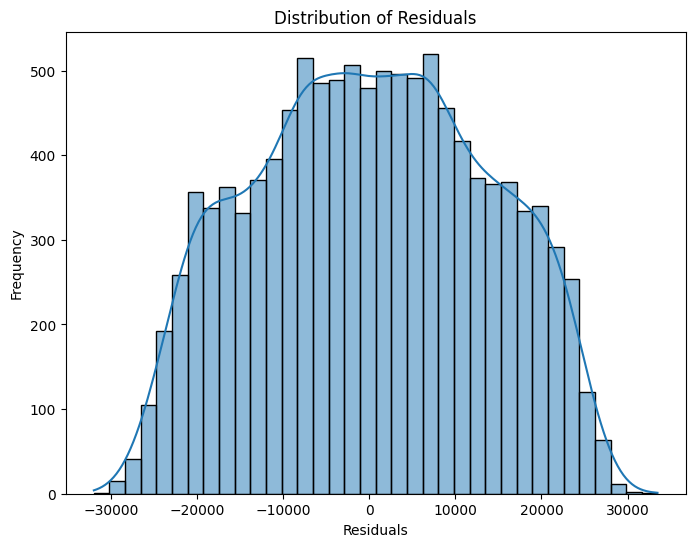

In [51]:
# Instead of confusion_matrix, use visualization techniques for regression like:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of predicted vs. actual values:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Billing Amount")
plt.ylabel("Predicted Billing Amount")
plt.title("Actual vs. Predicted Billing Amount")
plt.show()

# 2. Residual plot:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Billing Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()

# 3. Distribution plot of residuals:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 179548214.27
Root Mean Squared Error (RMSE): 13399.56
Mean Absolute Error (MAE): 11273.57
R-squared (R2): 0.10


Unique values in y_test_categorical: [-1  0  1  2]
Unique values in y_pred_categorical: [1 2]
Evaluation Metrics:
Accuracy: 0.82
Precision (Macro): 0.21
Precision (Weighted): 0.67
Recall (Macro): 0.25
Recall (Weighted): 0.82
F1-Score (Macro): 0.23
F1-Score (Weighted): 0.74

Classification Report:
              precision    recall  f1-score   support

     Unknown       0.00      0.00      0.00        14
         Low       0.00      0.00      0.00       850
      Medium       0.00      0.00      0.00      1134
        High       0.82      1.00      0.90      9102

    accuracy                           0.82     11100
   macro avg       0.21      0.25      0.23     11100
weighted avg       0.67      0.82      0.74     11100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

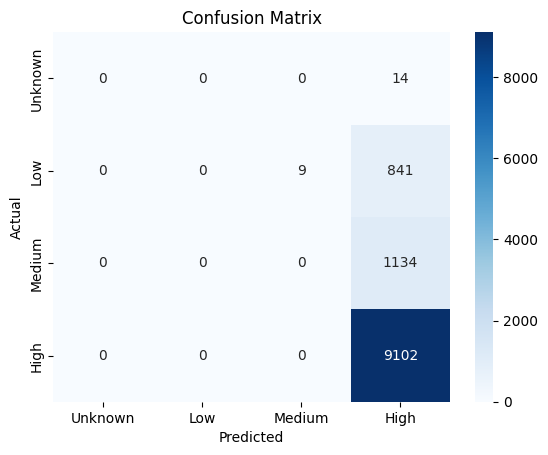

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Assuming you want to classify 'Billing Amount' into categories
# Create bins and labels for classification (adjust as needed)
bins = [0, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Convert continuous 'Billing Amount' to categorical labels in y_test and y_pred
y_test_categorical = pd.cut(y_test, bins=bins, labels=labels)
y_pred_categorical = pd.cut(y_pred, bins=bins, labels=labels)

# Convert categories to numerical codes before calculating metrics
y_test_categorical = y_test_categorical.cat.codes
y_pred_categorical = y_pred_categorical.codes  # Access .codes directly

# Check unique values in y_test_categorical and y_pred_categorical
print("Unique values in y_test_categorical:", np.unique(y_test_categorical))
print("Unique values in y_pred_categorical:", np.unique(y_pred_categorical))

# Get unique labels from both y_test_categorical and y_pred_categorical
unique_labels = np.unique(np.concatenate([y_test_categorical, y_pred_categorical]))

# Update target_names to include all unique labels
target_names = [labels[i] if i < len(labels) and i >= 0 else 'Unknown' for i in unique_labels]

# Accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)

# Precision
precision_macro = precision_score(y_test_categorical, y_pred_categorical, average='macro')
precision_weighted = precision_score(y_test_categorical, y_pred_categorical, average='weighted')

# Recall
recall_macro = recall_score(y_test_categorical, y_pred_categorical, average='macro')
recall_weighted = recall_score(y_test_categorical, y_pred_categorical, average='weighted')

# F1-Score
f1_macro = f1_score(y_test_categorical, y_pred_categorical, average='macro')
f1_weighted = f1_score(y_test_categorical, y_pred_categorical, average='weighted')

# Print results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Macro): {precision_macro:.2f}")
print(f"Precision (Weighted): {precision_weighted:.2f}")
print(f"Recall (Macro): {recall_macro:.2f}")
print(f"Recall (Weighted): {recall_weighted:.2f}")
print(f"F1-Score (Macro): {f1_macro:.2f}")
print(f"F1-Score (Weighted): {f1_weighted:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test_categorical, y_pred_categorical, target_names=target_names, labels=unique_labels))  # Pass labels argument

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred_categorical, labels=unique_labels)  # Pass labels argument
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

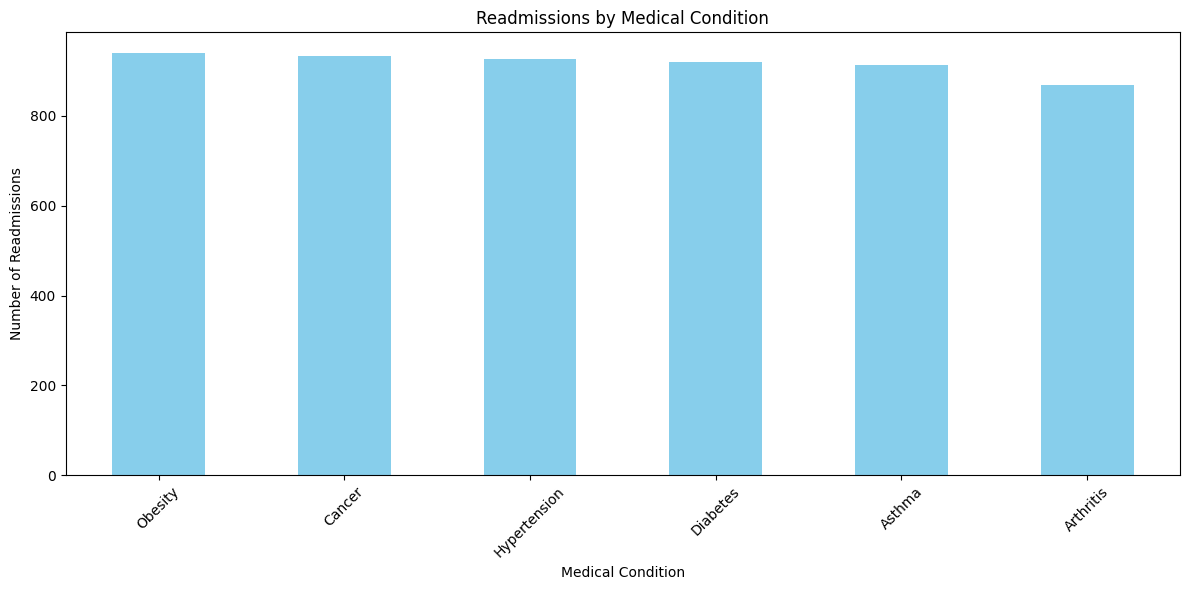

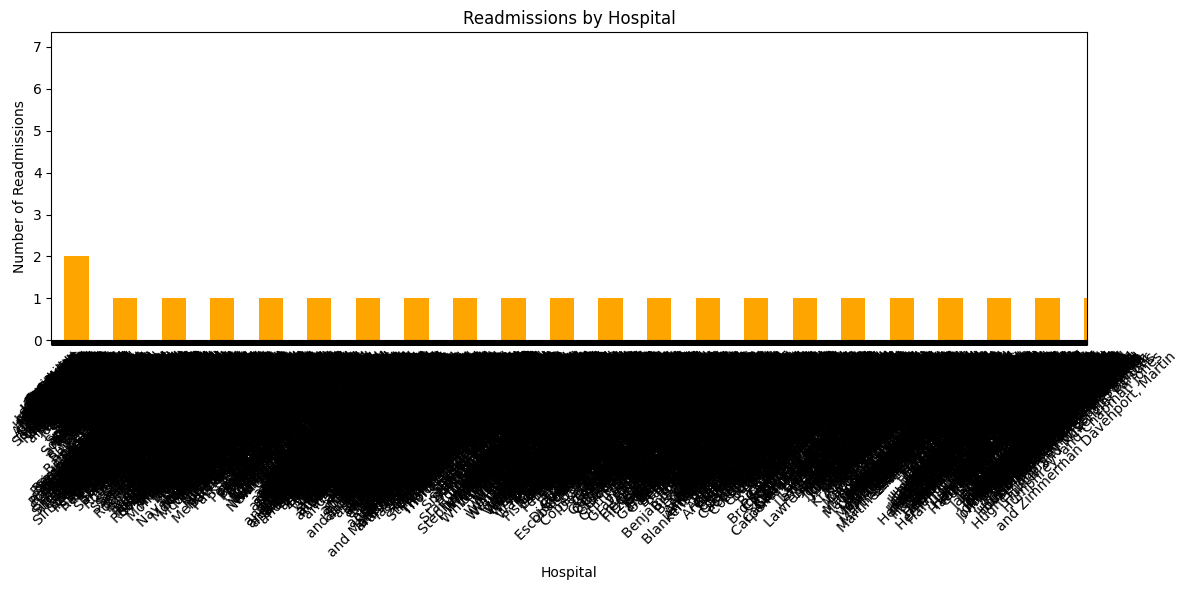

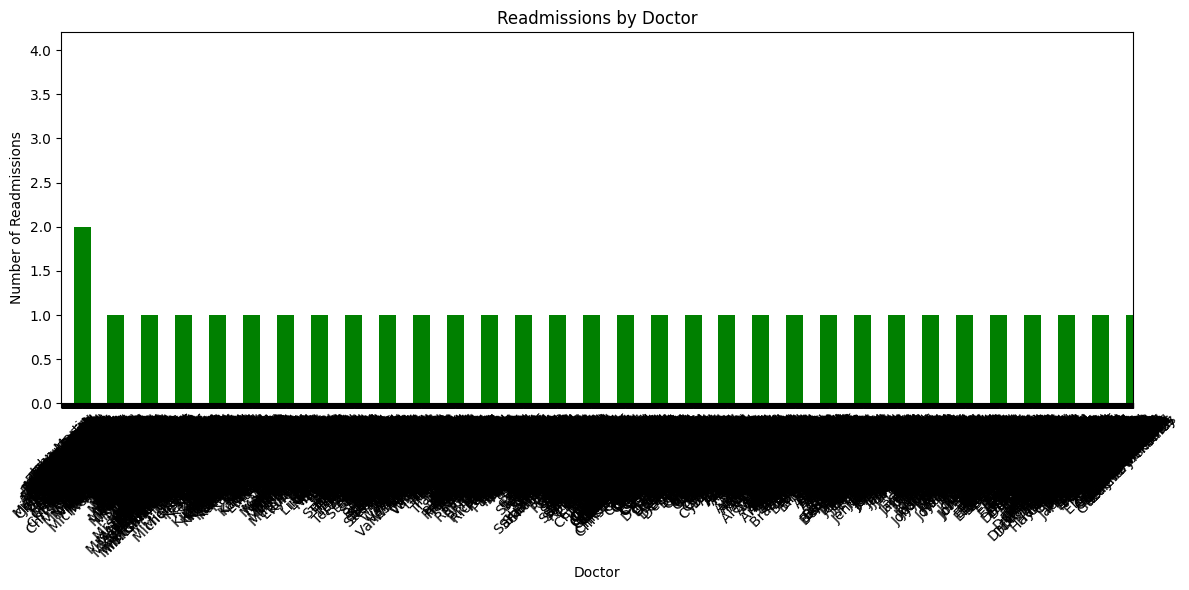

Summary of Readmissions by Medical Condition:
Medical Condition
Obesity         939
Cancer          933
Hypertension    926
Diabetes        920
Asthma          913
Arthritis       869
dtype: int64

Summary of Readmissions by Hospital:
Hospital
Inc Jackson                        7
Johnson Inc                        6
Inc Rodriguez                      5
Smith Inc                          5
Hernandez Ltd                      4
                                  ..
Inc Adams                          1
Inc Abbott                         1
Ibarra-Gomez                       1
Ibarra-Garcia                      1
and Zimmerman Davenport, Martin    1
Length: 5157, dtype: int64

Summary of Readmissions by Doctor:
Doctor
John Martin       4
Michael Smith     3
Robert Smith      3
Daniel Johnson    3
Brian Anderson    3
                 ..
Gary Carroll      1
Gary Brown        1
Gary Barrett      1
Gary Barr         1
Zachary Thomas    1
Length: 5329, dtype: int64


In [54]:
# Convert dates to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Sort data by Patient ID and Date of Admission
df = df.sort_values(by=['Name', 'Date of Admission'])

# Calculate time differences between admissions
df['Days Since Last Discharge'] = df.groupby('Name')['Date of Admission'].diff().dt.days

# Flag readmissions within 30 days
df['Readmission'] = df['Days Since Last Discharge'].apply(lambda x: 'Yes' if 0 <= x <= 30 else 'No')

# Analyze readmissions by medical condition
readmission_by_condition = df[df['Readmission'] == 'Yes'].groupby('Medical Condition').size()

# Analyze readmissions by discharge practices (e.g., hospital or doctor)
readmission_by_hospital = df[df['Readmission'] == 'Yes'].groupby('Hospital').size()
readmission_by_doctor = df[df['Readmission'] == 'Yes'].groupby('Doctor').size()

# Visualization: Readmissions by Medical Condition
plt.figure(figsize=(12, 6))
readmission_by_condition.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Readmissions by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Readmissions by Hospital
plt.figure(figsize=(12, 6))
readmission_by_hospital.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Readmissions by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Readmissions by Doctor
plt.figure(figsize=(12, 6))
readmission_by_doctor.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Readmissions by Doctor')
plt.xlabel('Doctor')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary Statistics for Readmissions
print("Summary of Readmissions by Medical Condition:")
print(readmission_by_condition.sort_values(ascending=False))

print("\nSummary of Readmissions by Hospital:")
print(readmission_by_hospital.sort_values(ascending=False))

print("\nSummary of Readmissions by Doctor:")
print(readmission_by_doctor.sort_values(ascending=False))